In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('community_records.csv')
df.describe()

,health_percentage
count,1500.000000
mean,60.787333
std,21.726991
min,0.000000
25%,42.000000
50%,57.000000
75%,85.000000
max,100.000000


In [3]:
filtered_df = df[df['health_percentage'] != 0]
filtered_df.describe()

,health_percentage
count,1476.000000
mean,61.775745
std,20.460740
min,12.000000
25%,42.000000
50%,57.000000
75%,85.000000
max,100.000000


ecosystem
npm         60.931864
pypi        61.327902
rubygems    63.094650
Name: health_percentage, dtype: float64


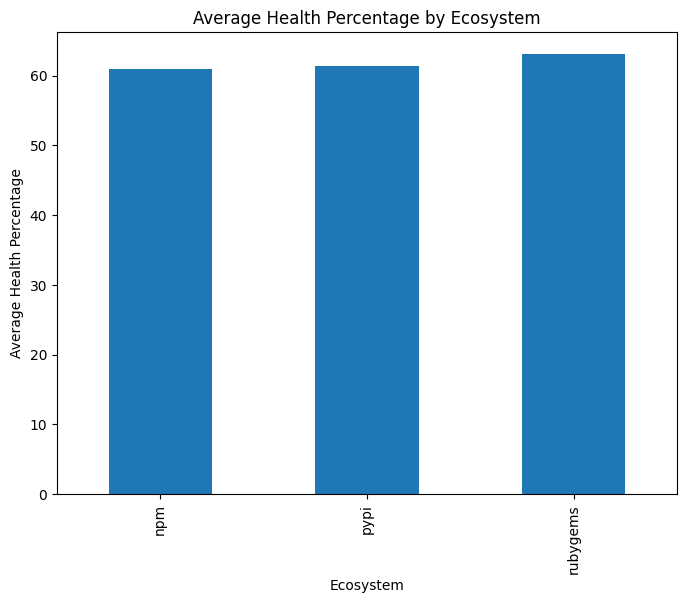

In [4]:

avg_health_percentage = filtered_df.groupby('ecosystem')['health_percentage'].mean()
print(avg_health_percentage)
plt.figure(figsize=(8, 6))
avg_health_percentage.plot(kind='bar')
plt.title('Average Health Percentage by Ecosystem')
plt.xlabel('Ecosystem')
plt.ylabel('Average Health Percentage')
plt.show()


               readme  code_of_conduct  contributing    license   
ecosystem                                                         
npm        100.000000        35.270541     51.703407  98.997996  \
pypi       100.000000        40.529532     54.786151  99.389002   
rubygems    99.794239        50.411523     60.905350  97.119342   

           pull_request_template  admin_accepts_content_report  
ecosystem                                                       
npm                    23.446894                      8.617234  
pypi                   30.753564                     10.590631  
rubygems               39.506173                      2.057613  


<Figure size 1000x600 with 0 Axes>

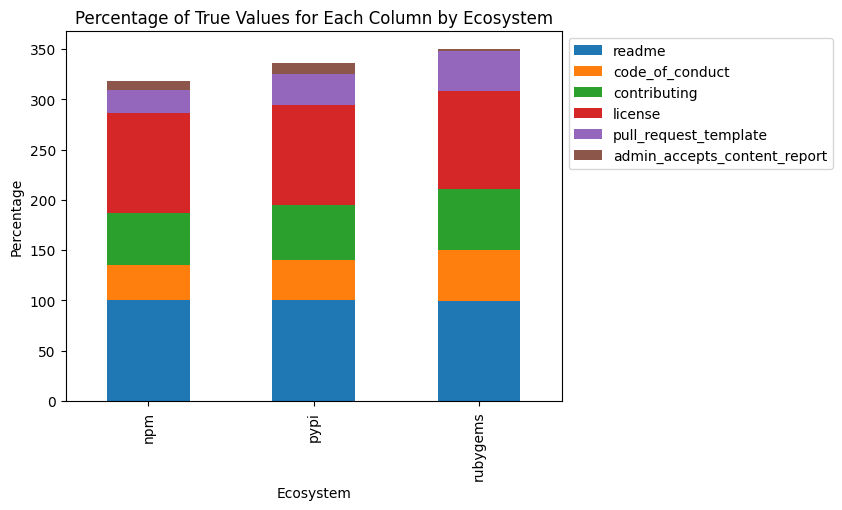

In [5]:
boolean_columns = ['readme', 'code_of_conduct', 'contributing', 'license', 'pull_request_template', 'admin_accepts_content_report']
percentage_by_ecosystem = filtered_df.groupby('ecosystem')[boolean_columns].mean() * 100
print(percentage_by_ecosystem)
plt.figure(figsize=(10, 6))
percentage_by_ecosystem.plot(kind='bar', stacked=True)
plt.title('Percentage of True Values for Each Column by Ecosystem')
plt.xlabel('Ecosystem')
plt.ylabel('Percentage')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

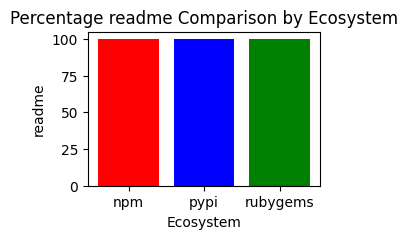

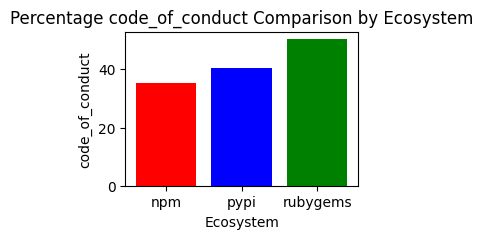

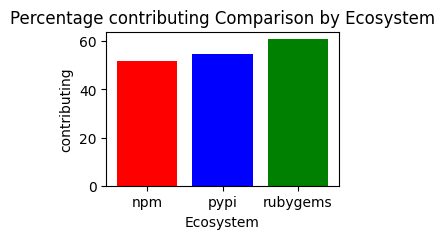

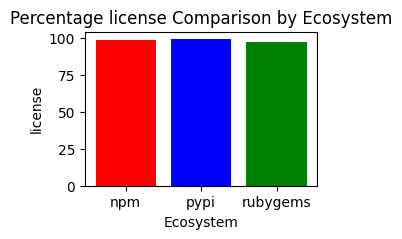

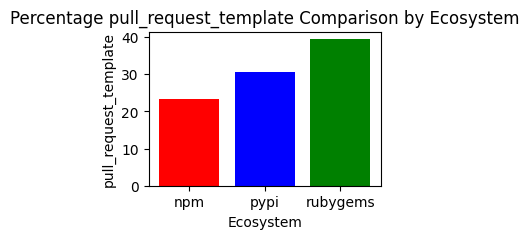

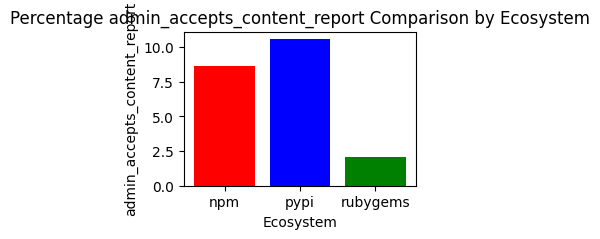

In [9]:
# Create bar plots for each metric
for metric in boolean_columns:
    plt.figure(figsize=(3, 2))
    plt.bar(percentage_by_ecosystem.index, percentage_by_ecosystem[metric], color=['red', 'blue', 'green'])
    plt.xlabel('Ecosystem')
    plt.ylabel(metric)
    plt.title(f'Percentage {metric} Comparison by Ecosystem')
    plt.show()